# Lab 3: Linear Regression

Name: **Krish Agarwal** <br>
Reg No: **21112016** <br>
Class: **4BSc DS A** <br>

---------------

### Objective: 
<br>  
1. Import the Dataset that you created as part of LAB 1 (Exported Dataset).  <br>
2. Perform basic EDA on the same.  <br>
3. Perform Linear Regression with the SKLearn Library.  <br>
4. Use different variations of Linear Regression as available in statsmodels library.  <br>
5. Compare the results of various models.

### Probelm Definition:  
Create a dataframe consisting of various Linear Regression types, test-size split, random state and their respective R2 Scores.

### Observations:  
1. It is observed that there are only 3 variables with moderate correltion to the Target variable.  
1. It is observed that Audi has the highest Price among all the brands, followed by Mercedes-Benz.  
1. It is observed that Maruti has the highest OdoMeterReading among all the brands, followed by Toyota.  
1.  It is observed that maximum number of cars have had only 1 owner.
1. It is observed that as the OdoMeterReading increases, the Price of the vehicle decreases.   
1. It can be observed that stats_models has majority of the models in the dataframe.
1. It is observed that Accuracy is the highest when feature selection method is correlation.
1. It is observed that the accuracy is highest when all the variables are taken into facotr.
1. It is observed that sklearn gives the maximum accuracy.

### References:  
1. Stackoverflow
2. Geek for Geeks
3. W3School

## **Completion Status**:

| Question Number | Status |
| --- | --- |
| 1 | Completed |
| 2 | Completed |
| 3 | Completed |
| 4 | Completed |
| 5 | Completed |

### Code:

In [1]:
# importing all the necessary libraries / modules
import pandas as pd
import numpy as np
import pickle
import regex as re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [80]:
# Importimg the data frame and weights

df = pd.read_csv("C:/Users/KRISH/Desktop/Python/SEM4/Lab/21112016_Lab1_ProcessedDataset.csv")
gasType_le = pickle.load(open("C:/Users/KRISH/Desktop/Python/SEM4/Lab/gasType_le.pickle", "rb"))
owners_le = pickle.load(open("C:/Users/KRISH/Desktop/Python/SEM4/Lab/owners_le.pickle", "rb"))
brand_le = pickle.load(open("C:/Users/KRISH/Desktop/Python/SEM4/Lab/brand_le.pickle", "rb"))
one_hot_encoder_dealing = pickle.load(open("C:/Users/KRISH/Desktop/Python/SEM4/Lab/one_hot_encoder_dealing.pickle", "rb"))
one_hot_encoder_gear = pickle.load(open("C:/Users/KRISH/Desktop/Python/SEM4/Lab/one_hot_encoder_gear.pickle", "rb"))
scaler_one = pickle.load(open("C:/Users/KRISH/Desktop/Python/SEM4/Lab/scaler_one.pickle", "rb"))
scaler_two = pickle.load(open("C:/Users/KRISH/Desktop/Python/SEM4/Lab/scaler_two.pickle", "rb"))
linear_regressor = pickle.load(open("C:/Users/KRISH/Desktop/Python/SEM4/Lab/linear_regressor.pickle", "rb"))

#### Data Wrangling

In [3]:
# Creating a Copy of data frame
df_copy = df.copy()

# Dropping the previous index
df.drop(['Unnamed: 0' , 'CarModel', 'Brand'], axis = 1, inplace = True)
df_copy.drop(['Unnamed: 0' , 'CarModel', 'Brand'], axis = 1, inplace = True)

In [4]:
# Replacing a column to a certain position

def moveColumn(df, column_name, position):
    column_to_move = df.pop(column_name)
    df.insert(position, column_name, column_to_move)

In [5]:
moveColumn(df, 'Brand Encoded', 0)
moveColumn(df, 'Price', len(df.columns)-1)

moveColumn(df_copy, 'Brand Encoded', 0)
moveColumn(df_copy, 'Price', len(df.columns)-1)

In [6]:
df.head()

,Brand Encoded,AgeOfCar,OdoMeterReading,Gas Type,NoOfOwners,Broker,Direct Owner,Trustmark Broker,Manual,Automatic,Price
0,8,8,1.766863,1,0,1.0,0.0,0.0,0.0,1.0,0.049549
1,17,11,1.689245,1,0,0.0,1.0,0.0,0.0,1.0,0.056869
2,25,9,0.724381,1,0,0.0,1.0,0.0,0.0,1.0,0.020270
3,26,13,0.295553,4,4,0.0,1.0,0.0,1.0,0.0,0.037162
4,25,12,1.153209,1,0,0.0,1.0,0.0,0.0,1.0,0.018018


#### Inverse Transforming

In [7]:
df_copy['Brand Encoded'] = brand_le.inverse_transform(df_copy['Brand Encoded'])
df_copy.rename(columns = {'Brand Encoded':'Brand'}, inplace = True)

In [8]:
df_copy['Gas Type'] = gasType_le.inverse_transform(df_copy['Gas Type'])

In [9]:
df_copy['Price'] = scaler_one.inverse_transform(df_copy[['Price']])

In [10]:
df_copy['OdoMeterReading'] = scaler_two.inverse_transform(df_copy[['OdoMeterReading']])

In [11]:
df_copy['NoOfOwners'] = owners_le.inverse_transform(df_copy[['NoOfOwners']])

In [12]:
# creating a user-defined function to inverse encode one hot encoding
def inverseOneHotEncode(df, columns, new_column):
    
    df[new_column] = 0
    for i in range(len(df)):
        for j in range(len(columns)):
            if df[columns[j]][i] == 1:
                df[new_column][i] = columns[j]
            else:
                pass
    df.drop(columns, axis = 1, inplace = True)

In [13]:
inverseOneHotEncode(df_copy, ['Broker', 'Direct Owner', 'Trustmark Broker'], 'Dealing Type')

In [14]:
inverseOneHotEncode(df_copy, ['Manual', 'Automatic'], 'Gear Type')

In [15]:
df_copy.head()

,Brand,AgeOfCar,OdoMeterReading,Gas Type,NoOfOwners,Price,Dealing Type,Gear Type
0,Ford,8,152620.0,Diesel,First Owner,574998.75,Broker,Automatic
1,Mahindra,11,149000.0,Diesel,First Owner,656250.00,Direct Owner,Automatic
2,Tata,9,104000.0,Diesel,First Owner,250000.00,Direct Owner,Automatic
3,Toyota,13,84000.0,Petrol,Third Owner,437500.00,Direct Owner,Manual
4,Tata,12,124000.0,Diesel,First Owner,225000.00,Direct Owner,Automatic


#### EDA

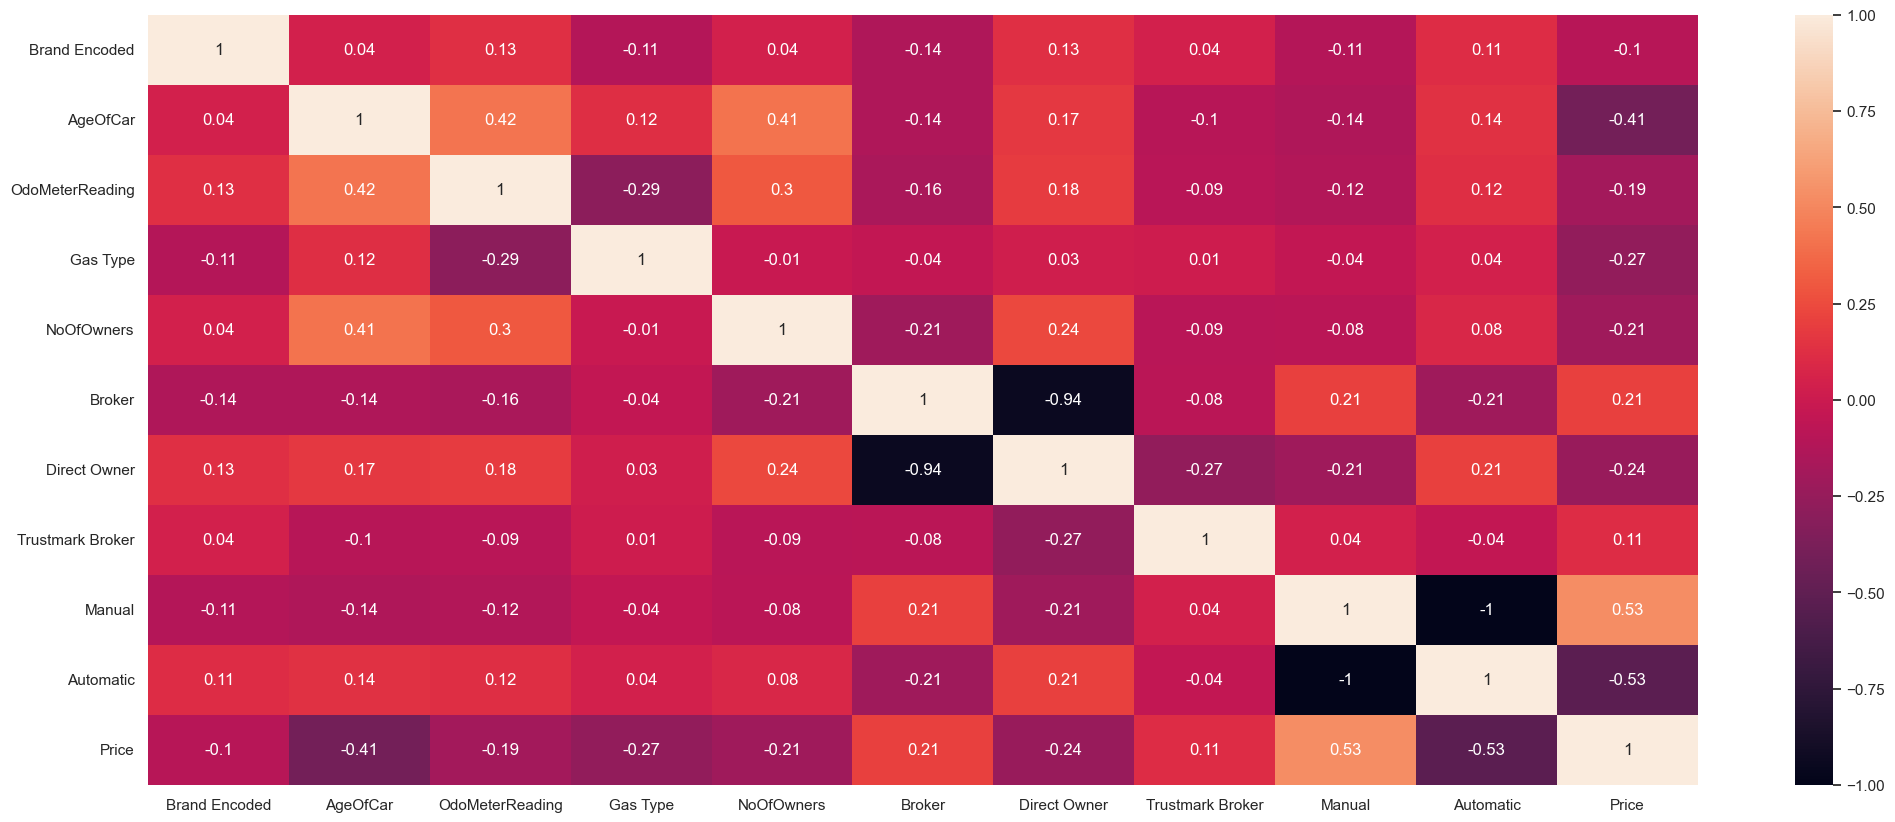

In [16]:
# --- 1) correlation heatmap ---
sns.set(rc={'figure.figsize':(25, 10)})
sns.heatmap(df.corr().round(2), annot=True)
plt.show()

*Inference*: It is observed that there are only 3 variables with moderate correltion to the Target variable.

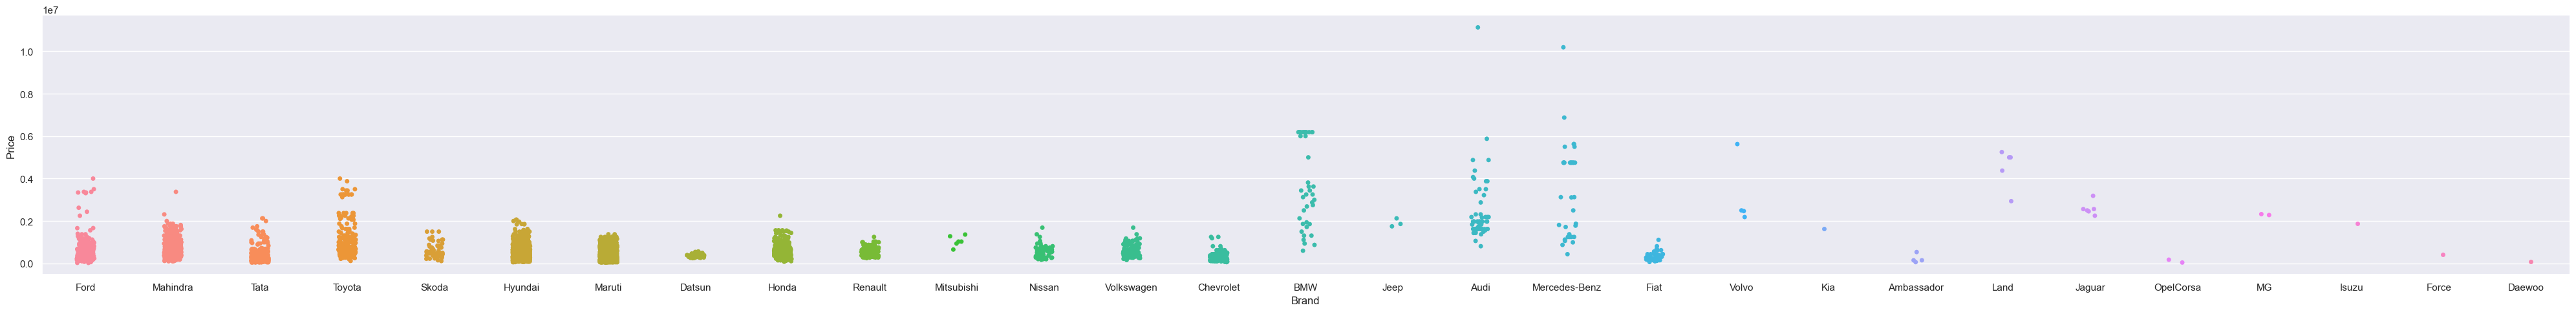

In [17]:
# --- 2) Catplot ---
sns.catplot(data = df_copy, x = 'Brand', y = 'Price', label = 'Brand vs Price', height = 5, aspect = 8)

*Inference*: It is observed that Audi has the highest Price among all the brands, followed by Mercedes-Benz.

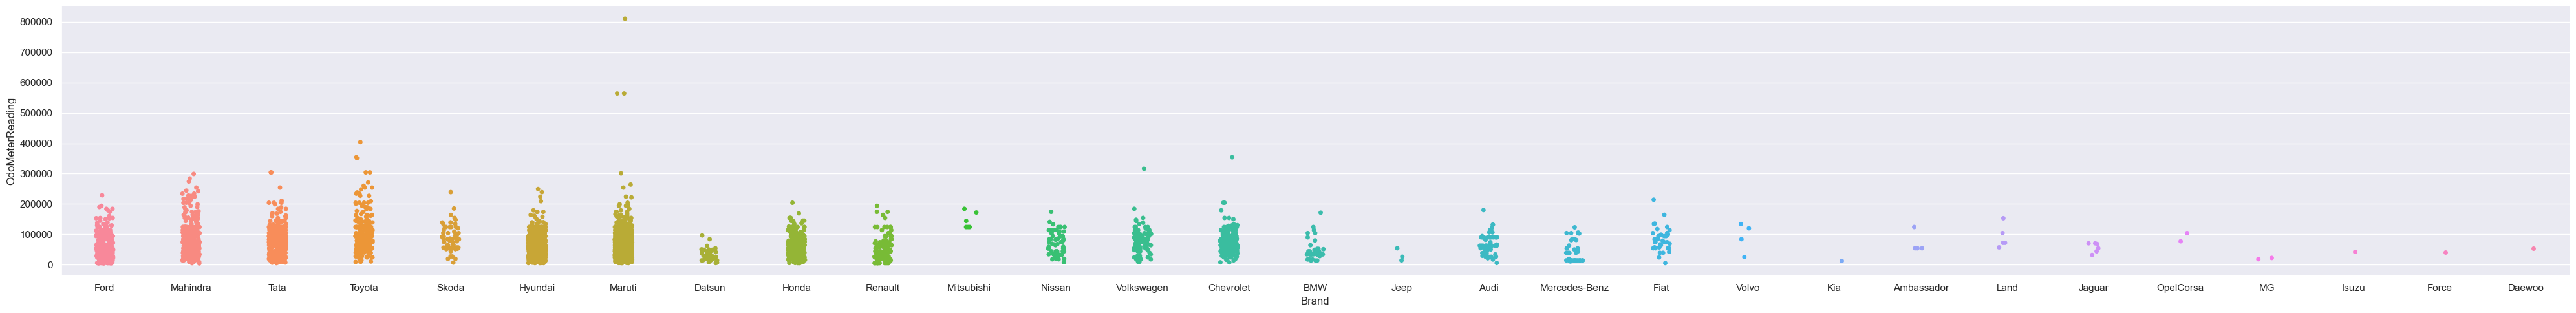

In [18]:
# --- 3) Catplot ---
sns.catplot(data = df_copy, x = 'Brand', y = 'OdoMeterReading', label = 'Brand vs OdoMeterReading', height = 5, aspect = 8)

*Inference*: It is observed that Maruti has the highest OdoMeterReading among all the brands, followed by Toyota.

<AxesSubplot:xlabel='NoOfOwners', ylabel='count'>

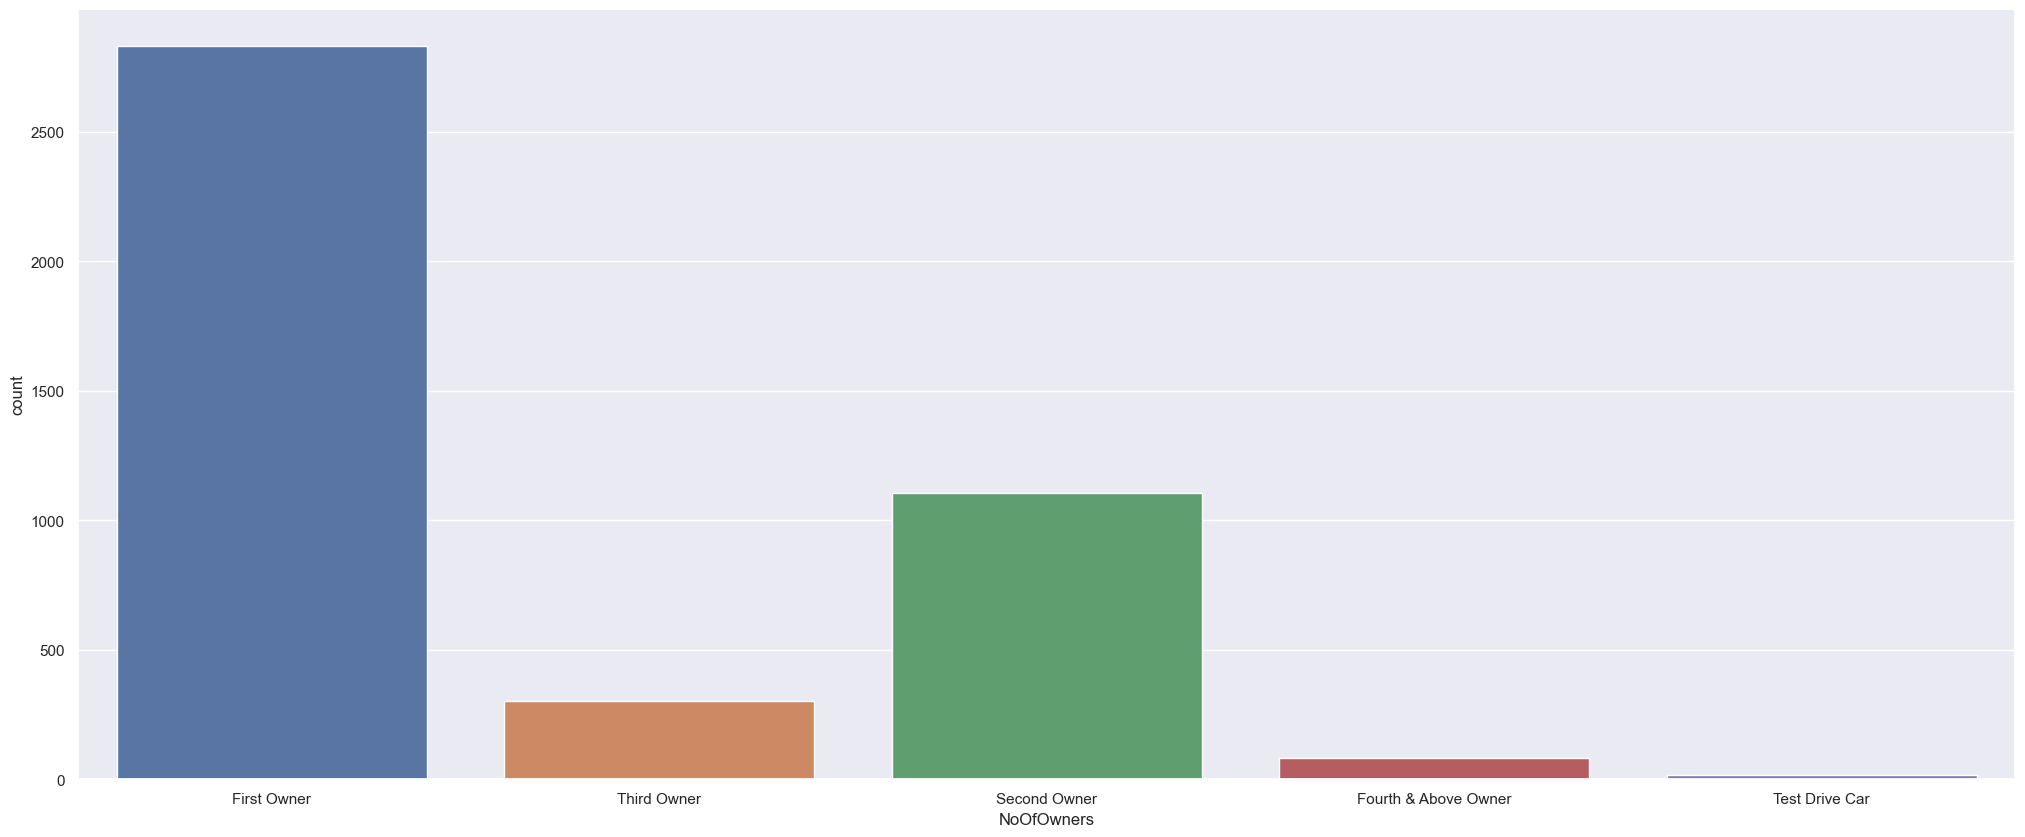

In [19]:
# --- 4) Countplot ---
sns.countplot(data = df_copy, x = 'NoOfOwners')

*Inference*: It is observed that maximum number of cars have had only 1 owner.

Text(0.5, 1.0, 'Price vs OdodMeterReading')

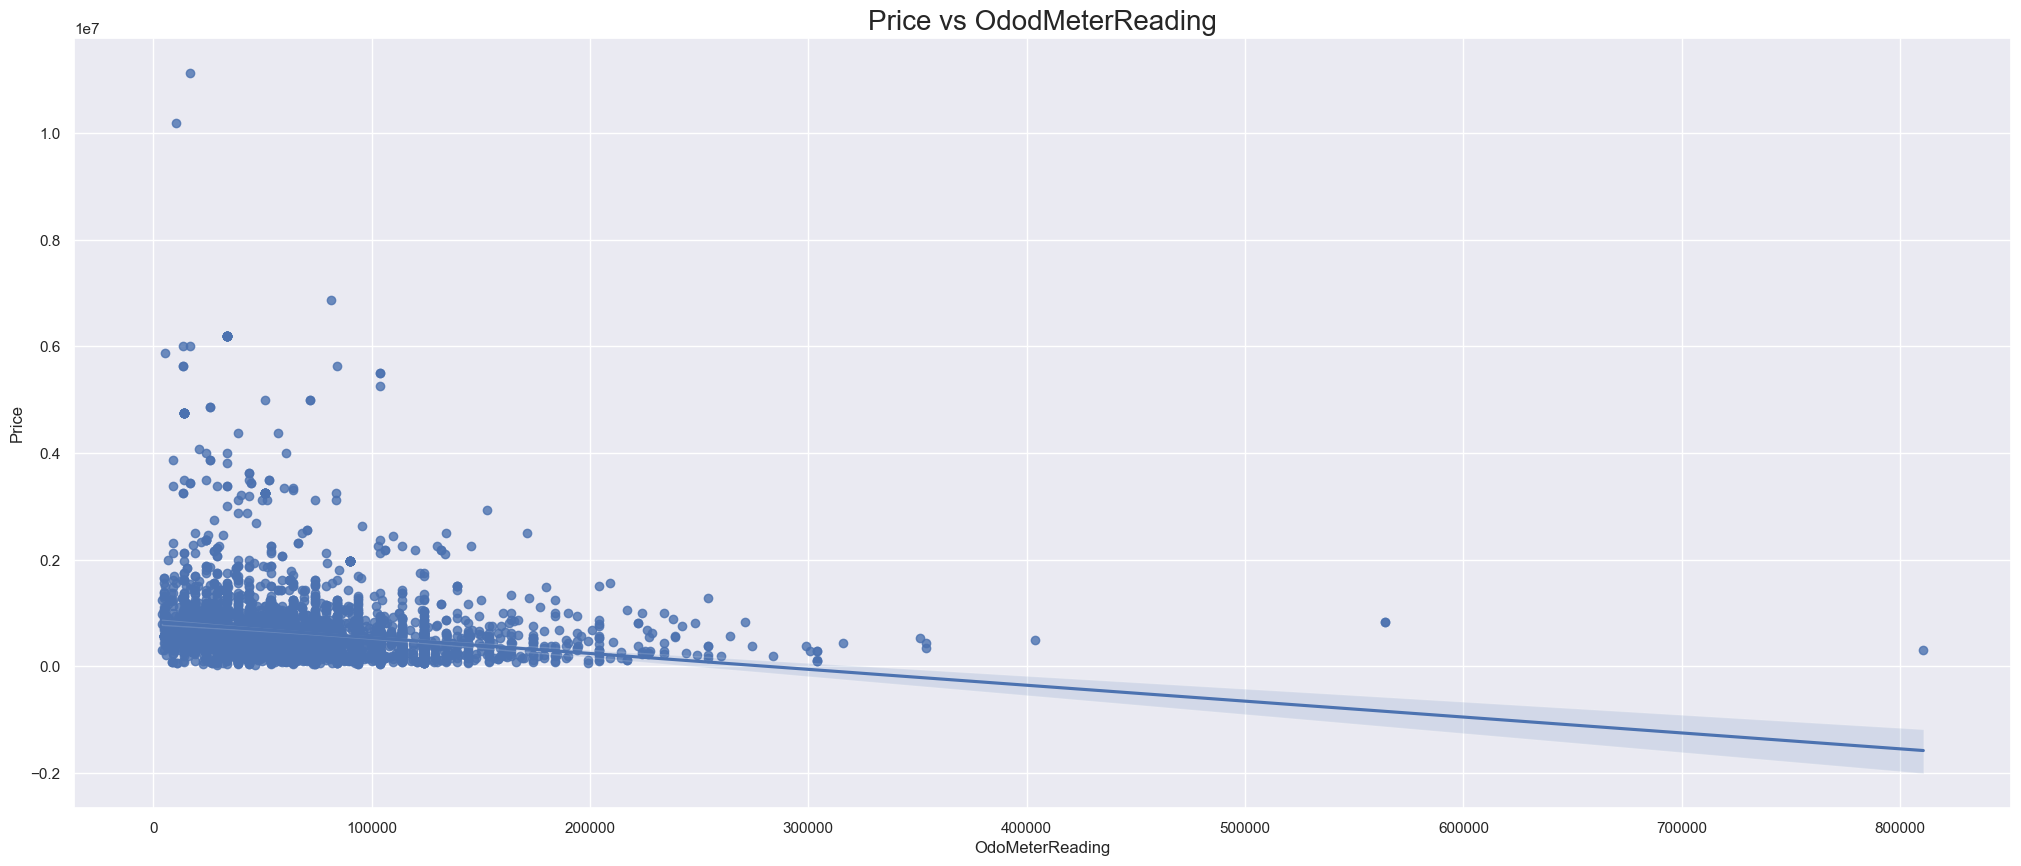

In [20]:
# --- 5) Regplot ---
sns.regplot(data = df_copy, x = 'OdoMeterReading', y = 'Price', label = 'Price vs OdodMeterReading')
plt.title('Price vs OdodMeterReading', fontsize = 20)

*Inference*: It is observed that as the OdoMeterReading increases, the Price of the vehicle decreases.

#### Linear Regression - SKLearn

In [21]:
def trainLinearRegression(X, y, random_state):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = random_state)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return r2_score(y_test, y_pred)

In [22]:
# --- Feature Selection ---
corr_matrix = df.corr()

features_strong = []
features_weak = []

for feature, value in corr_matrix['Price'].iteritems():
    if (abs(value) >= 0.4) and (feature != 'Price'):
        features_strong.append(feature)
    if (abs(value) < 0.4) and (feature != 'Price'):
        features_weak.append(feature)

In [23]:
# Creating a list including of all the cases
features = features_strong, features_weak, (list(df.columns[:-1]))
features

(['AgeOfCar', 'Manual', 'Automatic'],
 ['Brand Encoded',
  'OdoMeterReading',
  'Gas Type',
  'NoOfOwners',
  'Broker',
  'Direct Owner',
  'Trustmark Broker'],
 ['Brand Encoded',
  'AgeOfCar',
  'OdoMeterReading',
  'Gas Type',
  'NoOfOwners',
  'Broker',
  'Direct Owner',
  'Trustmark Broker',
  'Manual',
  'Automatic'])

In [24]:
# Creating a list of random states
random_states = [0, 10, 20, 30, 42]

# Creating a dataframe to store information about the parameters and their accuracies
accuracy_dataframe = pd.DataFrame(columns = ['Random State', 'Feature Selection Method', 'NoOfFeatures', 'Library', 'Accuracy'])

In [25]:
# Performing all possible linear regressions with the specified lists
for rs in random_states:
    for feature in features:
        acc = trainLinearRegression(df[feature], df['Price'], rs)
        new_accuracy = {}
        new_accuracy['Random State'] = rs
        new_accuracy['Library'] = 'Sklearn'
        new_accuracy['NoOfFeatures'] = len(feature)
        new_accuracy['Accuracy'] = acc
    
        if new_accuracy['NoOfFeatures'] == 3:
            new_accuracy['Feature Selection Method'] = 'Correlation > 0.4'
        elif new_accuracy['NoOfFeatures'] == 7:
            new_accuracy['Feature Selection Method'] = 'Correlation < 0.4'
        else:
            new_accuracy['Feature Selection Method'] = 'Correlation'
            
        accuracy_dataframe = accuracy_dataframe.append(new_accuracy, ignore_index = True)

#### Linear Regression - Stats models

In [27]:
# Collecting all the regressors in 1 list
regressors = [sm.OLS, sm.GLS, sm.WLS, sm.GLSAR]

In [28]:
for regressor in range(len(regressors)): 
    for feature in features:
        X, y = (df[feature]), (df['Price'])
        
        model = regressors[regressor](y, sm.add_constant(X)).fit()
        df_ = pd.read_html(model.summary().tables[0].as_html(),header=0,index_col=0)[0] # taking the r_score from evaluation 
        acc = float(df_.columns[len(df_.columns)-1])                                    # metrics from stats models output 
                                                                                        # and assigning it as accuracy
        new_accuracy = {}
        new_accuracy['Random State'] = '-'
        new_accuracy['NoOfFeatures'] = len(feature)
        new_accuracy['Accuracy'] = acc
        
        if regressor == 0:
            new_accuracy['Library'] = 'Stats Models - OLS'
        elif regressor == 1:
            new_accuracy['Library'] = 'Stats Models - GLS'
        elif regressor == 2:
            new_accuracy['Library'] = 'Stats Models - WLS'
        elif regressor == 3:
            new_accuracy['Library'] = 'Stats Models - GLSAR'       

        if new_accuracy['NoOfFeatures'] == 3:
            new_accuracy['Feature Selection Method'] = 'Correlation > 0.4'
        elif new_accuracy['NoOfFeatures'] == 7:
            new_accuracy['Feature Selection Method'] = 'Correlation < 0.4'
        else:
            new_accuracy['Feature Selection Method'] = 'Correlation'

        accuracy_dataframe = accuracy_dataframe.append(new_accuracy, ignore_index = True)

In [29]:
# Feature Selection on the basis of p-value
for regressor in range(len(regressors)):
    X_ = df.drop('Price', axis = 1)
    y_ = df[['Price']]
    
    model_ = regressors[regressor](y_, sm.add_constant(X_)).fit()
    df2 = pd.read_html(model.summary().tables[1].as_html(),header=0,index_col=0)[0] 
    
    p_greater = []
    p_smaller =[]

    for i in range(len(df2)):
        if df2['P>|t|'][i] > 0.05:
            p_greater.append(df2.index[i])
        else: 
            p_smaller.append(df2.index[i])

    p_smaller.pop(0)
    p_all = p_greater, p_smaller, list(p_greater + p_smaller)
    
    # Mapping regressors to all the features 
    for p in p_all:
        X, y = (df[p]), (df['Price'])
        
        model = regressors[regressor](y, sm.add_constant(X)).fit()                      # taking the r_score from evaluation 
        df_ = pd.read_html(model.summary().tables[0].as_html(),header=0,index_col=0)[0] # metrics from stats models output
        acc = float(df_.columns[len(df_.columns)-1])                                    # and assigning it as accuracy
        
        new_accuracy = {}
        new_accuracy['Random State'] = '-'
        new_accuracy['NoOfFeatures'] = len(p)
        new_accuracy['Accuracy'] = acc
        new_accuracy['Feature Selection Method'] = 'p-value'

        if regressor == 0:
            new_accuracy['Library'] = 'Stats Models - OLS'
        elif regressor == 1:
            new_accuracy['Library'] = 'Stats Models - GLS'
        elif regressor == 2:
            new_accuracy['Library'] = 'Stats Models - WLS'
        elif regressor == 3:
            new_accuracy['Library'] = 'Stats Models - GLSAR'
            
        if new_accuracy['NoOfFeatures'] == 1:
            new_accuracy['Feature Selection Method'] = 'p-value > 0.05'
        elif new_accuracy['NoOfFeatures'] == 9:
            new_accuracy['Feature Selection Method'] = 'p-value < 0.05'
        else:
            new_accuracy['Feature Selection Method'] = 'p-value'

        accuracy_dataframe = accuracy_dataframe.append(new_accuracy, ignore_index = True)

In [30]:
accuracy_dataframe

,Random State,Feature Selection Method,NoOfFeatures,Library,Accuracy
0,0,Correlation > 0.4,3,Sklearn,0.404261
1,0,Correlation < 0.4,7,Sklearn,0.234207
2,0,Correlation,10,Sklearn,0.474637
3,10,Correlation > 0.4,3,Sklearn,0.419656
4,10,Correlation < 0.4,7,Sklearn,0.226674
5,10,Correlation,10,Sklearn,0.482117
6,20,Correlation > 0.4,3,Sklearn,0.360393
7,20,Correlation < 0.4,7,Sklearn,0.180382
8,20,Correlation,10,Sklearn,0.410927
9,30,Correlation > 0.4,3,Sklearn,0.337655


#### Visualization

<AxesSubplot:ylabel='count'>

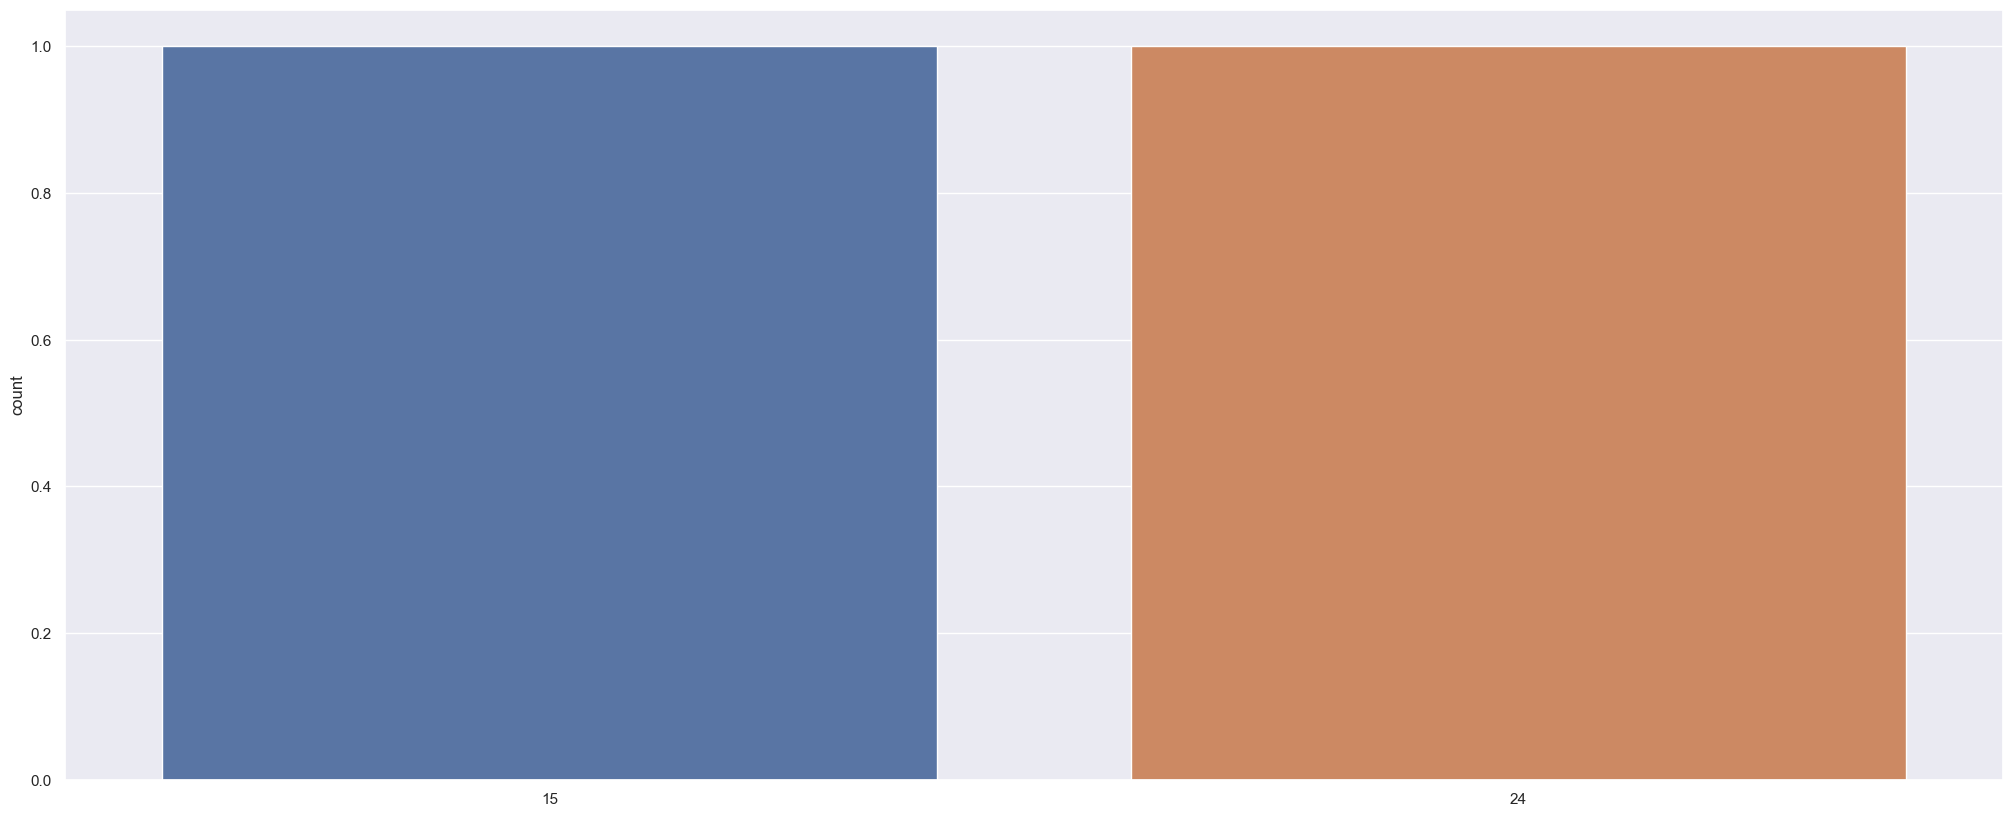

In [79]:
# --- Spreadness of Accuracy ---

count_sk = len(accuracy_dataframe[accuracy_dataframe['Library'].str.contains('Stats', regex=False)])
count_stm = len(accuracy_dataframe[accuracy_dataframe['Library'].str.contains('Sklearn', regex=False)])
sns.countplot([count_sk, count_stm])

*Inference*: It can be observed that stats_models has majority of the models in the dataframe.

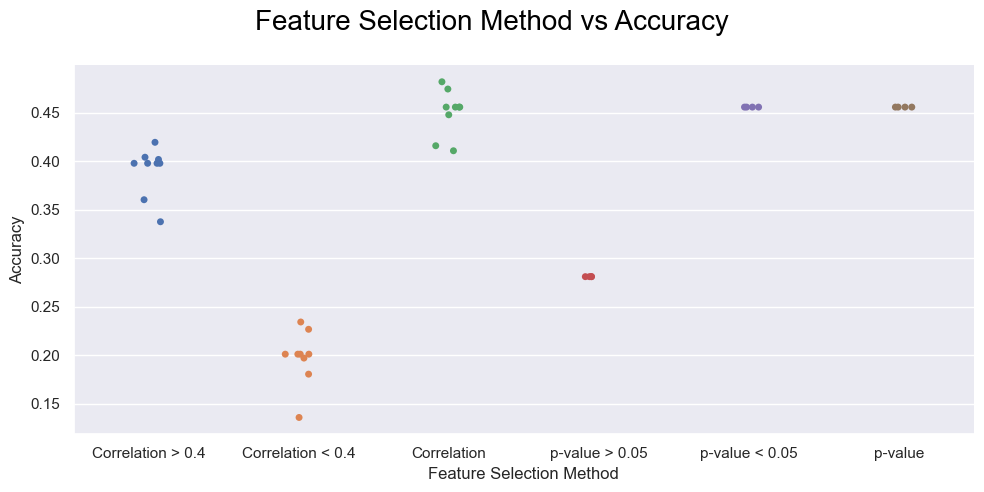

In [73]:
# --- Catplot: Feature Selection Method vs Accuracy ---

x = sns.catplot(data = accuracy_dataframe, x = 'Feature Selection Method', y = 'Accuracy', height = 5, aspect = 2)

x.fig.suptitle("Feature Selection Method vs Accuracy", fontsize=20, c='black')
plt.subplots_adjust(top=0.87)
plt.show()

*Inference*: It is observed that Accuracy is the highest when feature selection method is correlation.

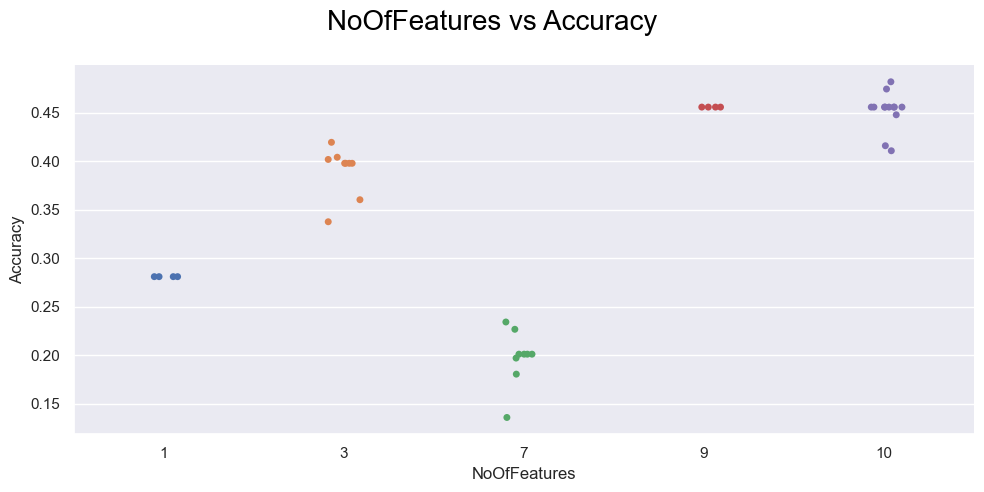

In [74]:
# --- Catplot: NoOfFeatures vs Accuracy ---

x = sns.catplot(data = accuracy_dataframe, x = 'NoOfFeatures', y = 'Accuracy', height = 5, aspect = 2)

x.fig.suptitle("NoOfFeatures vs Accuracy", fontsize=20, c='black')
plt.subplots_adjust(top=0.87)
plt.show()

*Inference*: It is observed that the accuracy is highest when all the variables are taken into facotr. 

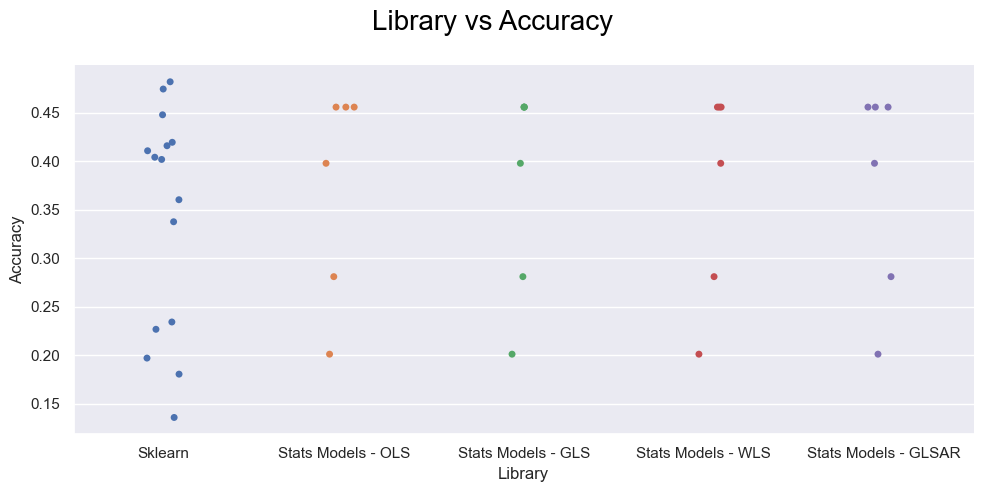

In [75]:
# --- Catplot: Library vs Accuracy ---

x = sns.catplot(data = accuracy_dataframe, x = 'Library', y = 'Accuracy', height = 5, aspect = 2)

x.fig.suptitle("Library vs Accuracy", fontsize=20, c='black')
plt.subplots_adjust(top=0.87)
plt.show()

*Inference*: It is observed that sklearn gives the maximum accuracy.

#### Prediction

In [134]:
def predictPrice():
    
    age_car = int(input("Enter the Age of Car: "))
    gas_type = input("Enter the type of Gas, the car uses: ")
    num_of_owners = input("Enter the number of Owners the car has had: ")
    dealing_type_one = input("Enter the type of Dealing: ")
    gear_type_one = input("Enter the Gear Type: ")
    print("-"*25)
    
    gas_type = gasType_le.transform([gas_type])
    num_of_owners = owners_le.transform([num_of_owners])
    
    if dealing_type_one == "Broker":
        dealing_type_one = 1
        dealing_type_two = 0
    elif dealing_type_one == "Direct Owner":
        dealing_type_one = 0
        dealing_type_two = 1
    else:
        dealing_type_one = 0
        dealing_type_two = 0
    
    if gear_type_one == "Manual":
        gear_type_one = 1
        gear_type_two = 0
    elif gear_type_one == "Automatic":
        gear_type_one = 0
        gear_type_two = 1
        
    price = linear_regressor.predict([[age_car, gas_type, num_of_owners, dealing_type_one, dealing_type_two, gear_type_one, gear_type_two]])
    return float(price[0])

In [135]:
price = predictPrice()
print("Price of the Car is", price)

Enter the Age of Car: 5
Enter the type of Gas, the car uses: Petrol
Enter the number of Owners the car has had: Third Owner
Enter the type of Dealing: Broker
Enter the Gear Type: Automatic
-------------------------
Price of the Car is 0.051110932455351143


<hr>